# Words and Their Co-occurences

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

from vdata import Voynich, Folio
a = Voynich()

In [3]:
lines = list(a.data[a.data.words <= 4].text)
words = ' '.join(lines).split()
print(len(lines), 'lines')
print(len(words), 'words')

1493 lines
2895 words


Don't worry, we still have most of them

In [4]:
lines = list(a.data[a.data.words > 4].text)
words = ' '.join(lines).split()
print(len(lines), 'lines')
print(len(words), 'words')

3721 lines
34991 words


In [5]:
lines[:10]

['fachys ykal ar ataiin shol shory cthres y kor sholdy',
 'sory ckhar or y kair chtaiin shar are cthar cthar dan',
 'syaiir sheky or ykaiin shod cthoary cthes daraiin sa',
 'ooiin oteey oteos roloty cthar daiin otaiin or okan',
 'dair y chear cthaiin cphar cfhaiin',
 'odar o y shol cphoy oydar sh s cfhoaiin shodary',
 'yshey shody okchoy otchol chocthy oschy dain chor kos',
 'ydain cphesaiin ol s cphey ytain shoshy cphodales',
 'oksho kshoy otairin oteol okan shodain sckhey daiin',
 'shoy ckhey kodaiin cphy cphodaiils cthey she oldain d']

# Bigram co-occurences

In [6]:
def build_ngram_dict(text, n=3):
    trigrams = [text[i:i+n] for i in range(len(text) - n)]
    trigrams = list(set(trigrams))
    t2i = {x:i for i,x in enumerate(trigrams)}
    i2t = {x:i for i,x in t2i.items()}
    return t2i, i2t

In [7]:
text = ' '.join(lines)
text = text

In [8]:
from collections import deque

t2i, i2t = build_ngram_dict(text, n=2)
n = len(t2i.keys())

print('building a {} by {} matrix...'.format(n,n))

# build co_occurence matrix
co_occurences = np.zeros((n,n))

# run through the text
d = deque(maxlen=20)
for i in range(len(text) - 2):
    chars = text[i:i+2]
    for i in d:
        a_int = t2i[chars]
        b_int = t2i[i]
        co_occurences[a_int, b_int] += 1
    
    d.append(chars)
print('done')

building a 324 by 324 matrix...
done


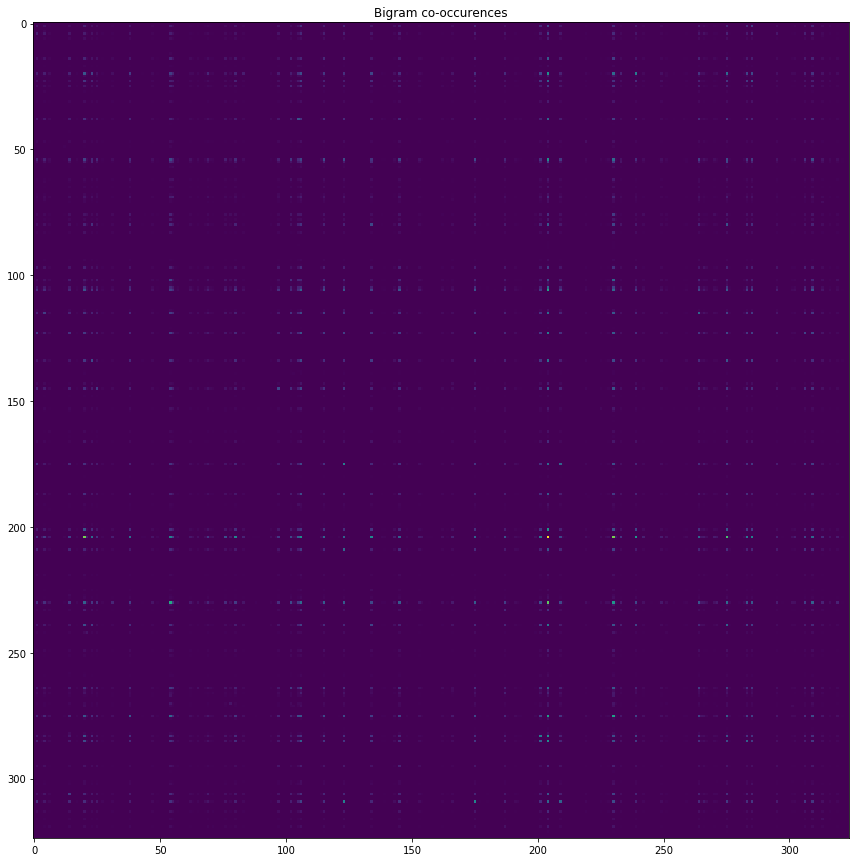

In [9]:
# visualize the result
plt.figure(figsize=(15,15))
plt.title('Bigram co-occurences')
_ = plt.imshow(co_occurences)

We want to filter out all the background and only get the high-frequency co-occurences

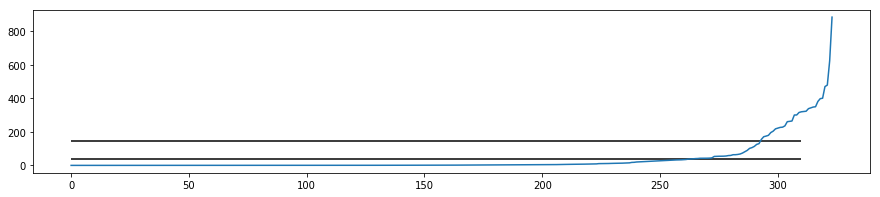

In [12]:
va = np.mean(co_occurences, axis=0)
mean, sd = np.mean(va), np.std(va)

plt.figure(figsize=(15, 3))
plt.plot(sorted(va))
plt.hlines([mean, mean+sd], 0, 310)

[  1   4   6  14  20  21  23  25  31  38  47  54  55  62  65  69  76  78
  80  83  97 102 105 106 114 115 123 134 143 145 153 162 166 175 187 201
 204 209 219 230 233 239 242 249 264 265 266 267 270 271 275 283 285 295
 302 306 309 313 319]


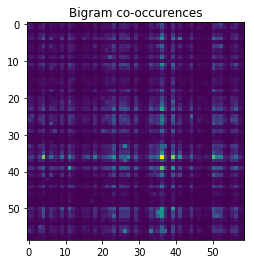

In [13]:
va_good = np.where(va > mean)
indices = va_good[0]
print(indices)

new_stuff = co_occurences[indices, :][:,indices]

# visualize the result
plt.title('Bigram co-occurences')
_ = plt.imshow(new_stuff)

In [15]:
# the bigrams that these correspond to
' '.join([i2t[x] for x in indices])

'ka al  t  d dy ck ke or kc sh m   c eo o  ko od hy ct ey hd ar ho  s  o ir l  ai ee lk r  s  to  l in ot  q y  ii am ch te ed kh  k ol lc ta ha th pc he qo ok  a ky da n   y tc'

## What does it mean for certain bigrams/letters to be frequently co-located?

* I don't know yet

What is the length of words here?

In [236]:
len(list(udhr.words('English-Latin1')))

1781

In [260]:
from nltk.corpus import europarl_raw
from itertools import islice

finnish = europarl_raw.finnish.words()
for t in nltk.bigrams(islice(finnish, 10)):
    print(t)

('Istuntokauden', 'uudelleenavaaminen')
('uudelleenavaaminen', 'Julistan')
('Julistan', 'perjantaina')
('perjantaina', 'joulukuun')
('joulukuun', '17.')
('17.', 'päivänä')
('päivänä', 'keskeytetyn')
('keskeytetyn', 'Euroopan')
('Euroopan', 'parlamentin')


 dir(europarl_raw)

 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'italian',
 'portuguese',
 'spanish',

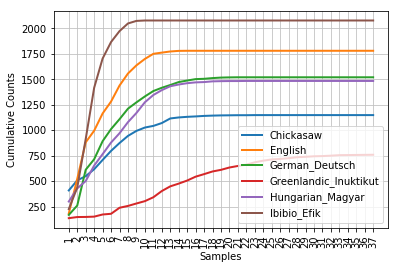

In [231]:
import nltk
# # nltk.download('udhr')
# nltk.download('europarl_raw')

from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

cfd.plot(cumulative=True)

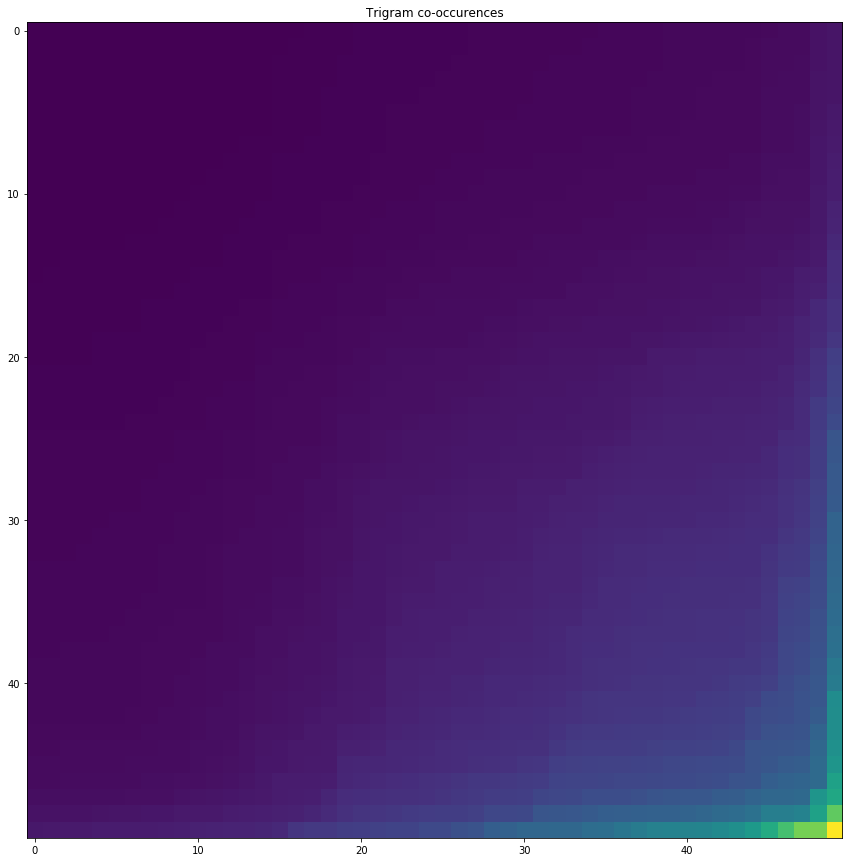

In [213]:
# we could also sort 
co_occurences.sort(0)
co_occurences.sort(1)

# visualize the result
plt.figure(figsize=(15,15))
plt.title('Trigram co-occurences')
_ = plt.imshow(co_occurences[-50:, -50:])

In [94]:
co_occurences[-50:, -50:]

array([[  2.,   2.,   2., ...,  19.,  23.,  31.],
       [  2.,   2.,   2., ...,  19.,  23.,  32.],
       [  2.,   2.,   2., ...,  19.,  23.,  32.],
       ...,
       [ 11.,  11.,  12., ..., 105., 131., 248.],
       [ 14.,  14.,  14., ..., 130., 141., 282.],
       [ 15.,  15.,  16., ..., 153., 251., 294.]])